# Ford GoBike Data Visualization

## by Mohammed Albluwi


## Contents
- [Gathering data](#gather)
- [Accessing data](#access)
- [Quality issues](#q_issues)
- [Tidness issues](#t_issues)
- [Cleaning data](#clean)
- [Quality clean Tasks](#q_clean)
- [Tidness clean Tasks](#t_clean)
- [Storing the data](#s_01)
- [The features of interest](#features_01)
- [Univariate Exploration](#u_exploration)
- [Bivariate Exploration](#b_exploration)
- [Univariate Exploration](#m_exploration)

<a id='gather'></a>
## Gather

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
#import wptools
#import tweepy
import os
import re
import requests
from PIL import Image
from io import BytesIO
#from tweepy import OAuthHandler
import json
#from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# read the file
#df_airline=pd.read_csv("airline_delay_causes.csv")
#df_goBike=pd.read_csv("FordGoBike_2017_2019.csv")
#df_goBike.head(7)

In [6]:
# load in the dataset into a pandas dataframe
#Read CSV files for years 2006,2007 and 2008 into individual dataframes
df_2017=pd.read_csv('2017-fordgobike-tripdata.csv')
df_2018_01=pd.read_csv('201801-fordgobike-tripdata.csv')
df_2018_02=pd.read_csv('201802-fordgobike-tripdata.csv')
df_2018_03=pd.read_csv('201803-fordgobike-tripdata.csv')
df_2018_04=pd.read_csv('201804-fordgobike-tripdata.csv')
df_2018_05=pd.read_csv('201805-fordgobike-tripdata.csv')
df_2018_06=pd.read_csv('201806-fordgobike-tripdata.csv')
df_2018_07=pd.read_csv('201807-fordgobike-tripdata.csv')
df_2018_08=pd.read_csv('201808-fordgobike-tripdata.csv')
df_2018_09=pd.read_csv('201809-fordgobike-tripdata.csv')
df_2019_02=pd.read_csv('201902-fordgobike-tripdata.csv')
#Append all three dataframes and save into master df
df_goBike = df_2017.append([df_2017, df_2018_01, df_2018_02, 
                            df_2018_03, df_2018_04, df_2018_05,
                            df_2018_06, df_2018_07, df_2018_08,
                            df_2018_09, df_2019_02 ])

In [7]:
df_goBike.tail(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [8]:
#let's check out the shape
df_goBike.shape

(2619577, 16)

In [9]:
# check out the structure of DF
df_goBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619577 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 339.8+ MB


In [10]:
# how many columns we have
len(df_goBike.columns)

16

In [11]:
#let's check out the description
df_goBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.619577e+06,2.609641e+06,2.619577e+06,2.619577e+06,2.609641e+06,2.619577e+06,2.619577e+06,2.619577e+06,2.386275e+06
mean,9.574587e+02,1.097593e+02,3.776918e+01,-1.223553e+02,1.076609e+02,3.776933e+01,-1.223547e+02,2.161620e+03,1.982047e+03
std,2.885250e+03,9.537702e+01,9.779569e-02,1.487854e-01,9.504489e+01,9.769756e-02,1.484044e-01,1.351254e+03,1.055237e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.878000e+03
25%,3.620000e+02,2.900000e+01,3.777166e+01,-1.224116e+02,2.700000e+01,3.777241e+01,-1.224099e+02,1.067000e+03,1.976000e+03
50%,5.700000e+02,8.000000e+01,3.778175e+01,-1.223983e+02,7.700000e+01,3.778241e+01,-1.223974e+02,2.126000e+03,1.984000e+03
75%,8.960000e+02,1.760000e+02,3.779539e+01,-1.223881e+02,1.760000e+02,3.779539e+01,-1.223881e+02,3.036000e+03,1.990000e+03
max,8.636900e+04,3.980000e+02,4.551000e+01,-7.357000e+01,3.980000e+02,4.551000e+01,-7.357000e+01,6.645000e+03,2.001000e+03


In [19]:
# Let's find out if there is any duplicates in the data
df_goBike.duplicated().sum()

519700

In [20]:
# after merging all the CSV files, we might have duplicate index in our DF
sum(df_goBike.index.duplicated())

2099877

In [21]:
# confirm correction by rechecking for duplicates in the data
sum(df_goBike.duplicated())

519700

In [22]:
# Now, let's check for any NaN values in the data
df_goBike.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id              9936
start_station_name            9936
start_station_latitude           0
start_station_longitude          0
end_station_id                9936
end_station_name              9936
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
member_birth_year           233302
member_gender               232807
bike_share_for_all_trip    1039400
dtype: int64

In [23]:
# find out if there is any member over 100 year old 
df_goBike.query('member_birth_year < 1920').shape


(1809, 16)

In [24]:
# check out the NaN value
df_goBike.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id              9936
start_station_name            9936
start_station_latitude           0
start_station_longitude          0
end_station_id                9936
end_station_name              9936
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
member_birth_year           233302
member_gender               232807
bike_share_for_all_trip    1039400
dtype: int64

In [25]:
# what are these NaN?
df_goBike[df_goBike['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
168,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
180,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
197,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
233,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
260,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


# Issues

<a id='q_issues'></a>
#### Data Quality & Tidness Issues

1. [Duplicate index](#q_01)
2. [Duplicate rows](#q_02)
3. [Many null values for several columns.](#q_03)
4. [Data types of some columns are inappropriate.](#q_4)
5. [some values violate the rule of accuracy.](#q_05)

<a id='t_issues'></a>
#### Data Tidness Issues

1. [Two columns need to be split into 7 columns each.](#t_01)
2. [A new column has to be added to represents needs information.](#t_02)

<a id='clean'></a>
# Clean

<a id='q_clean'></a>
## Quality

In [26]:
df_goBike_clean = df_goBike.copy()

<a id='q_01'></a>
#### 01 Define 
Reset index

#### Code

In [27]:
df_goBike_clean = df_goBike_clean.reset_index()

#### Test

In [28]:
(sum(df_goBike_clean.index.duplicated())) == 0

True

<a id='q_02'></a>
#### 02 Define 
remove duplicate rows from the dataframe

#### Code

In [29]:
# drop duplicates
df_goBike_clean.drop_duplicates(inplace=True)

#### Test

In [30]:
# confirm correction by rechecking for duplicates in the data
sum(df_goBike_clean.duplicated())

0

<a id='q_03'></a>
#### 03 Define 
remove null values from the data frame

#### Code

In [31]:
# first we need to check again the total of null for each column
df_goBike_clean.isnull().sum()

index                           0
duration_sec                    0
start_time                      0
end_time                        0
start_station_id             9936
start_station_name           9936
start_station_latitude          0
start_station_longitude         0
end_station_id               9936
end_station_name             9936
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          166761
member_gender              166345
bike_share_for_all_trip    519700
dtype: int64

As you see above, we guess that if we remove the null values from 'start_station_id' we end up with removing all 197 null values from all columns. Then we remove the null from 'member_birth_year' and hope we have no more none in the DF. 

In [32]:
# remove null values from 'start_station_id' and 'member_birth_year'
df_goBike_clean = df_goBike_clean[df_goBike_clean.start_station_id.notnull()]
df_goBike_clean = df_goBike_clean[df_goBike_clean.member_birth_year.notnull()]

#### Test

In [33]:
# it should be zero
df_goBike_clean.isnull().sum()

index                           0
duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year               0
member_gender                   0
bike_share_for_all_trip    453159
dtype: int64

#### 'bike_share_for_all_trip' is still has null values. We need to clean it

<p style="color:red">As you see below we disabled the commands as we found out that 'bike_share_for_all_trip' column wasn't used for the 2017 data frame. If we run the below lines, we would loss all 2017 records. We tolerated it as we didn't need it for our features of interest</p> 

In [34]:
#df_goBike_clean = df_goBike_clean[df_goBike_clean.bike_share_for_all_trip.notnull()]

In [35]:
# it must be zero
#df_goBike_clean.isnull().sum()

In [36]:
# lets check out how many rows we have
df_goBike_clean.shape

(1923456, 17)

<a id='q_04'></a>
#### 04 Define

Convert the following columns to the appropriate data type:

<b>'start_station_id'</b> and <b>'end_station_id'</b> to the int format.<br />
<b>'bike_id'</b>, <b>'start_station_id'</b>, and <b>'end_station_id'</b> to object format.<br />
<b>'user_type'</b>, <b>'member_gender'</b>, and <b>'bike_share_for_all_trip'</b> to category format.<br />
<b>'start_time'</b>, <b>'end_time'</b> to the timestamp format.<br />
<b>'member_birth_year'</b> to int format.</b>


#### Code

In [37]:
# convert 'start_station_id' and 'end_station_id' from float to the int format
df_goBike_clean.start_station_id = df_goBike_clean.start_station_id.astype('int64')
df_goBike_clean.end_station_id = df_goBike_clean.end_station_id.astype('int64')

In [38]:
# change the type of 'bike_id', 'start_station_id, and 'end_station_id' to object format.
df_goBike_clean.bike_id = df_goBike_clean.bike_id.astype(str)
df_goBike_clean.start_station_id = df_goBike_clean.start_station_id.astype(str)
df_goBike_clean.end_station_id = df_goBike_clean.end_station_id.astype(str)

In [39]:
# change 'user_type', 'member_gender', and'bike_share_for_all_trip' to category format.
df_goBike_clean.user_type = df_goBike_clean.user_type.astype('category')
df_goBike_clean.member_gender = df_goBike_clean.member_gender.astype('category')
df_goBike_clean.bike_share_for_all_trip = df_goBike_clean.bike_share_for_all_trip.astype('category')

In [40]:
# change 'start_time', 'end_time' to the timestamp format.
df_goBike_clean.start_time = pd.to_datetime(df_goBike_clean.start_time)
df_goBike_clean.end_time = pd.to_datetime(df_goBike_clean.end_time)

In [41]:
# convert 'member_birth_year' from float to int
df_goBike_clean.member_birth_year = df_goBike_clean.member_birth_year.astype('int64')

#### Test

In [42]:
df_goBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923456 entries, 0 to 2619576
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   index                    int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                category      
 14  member_birth_year        int64         
 15  member_gender            category      
 16  bike_share_for_all_trip  category      
dtypes: category(3), datetime64[

In [43]:
df_goBike_clean.head(7)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,NaN
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,NaN
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,NaN
6,6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,NaN
12,12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,NaN
13,13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990,Male,NaN
15,15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,1980,Female,NaN


<a id='q_05'></a>
#### 05 Define

remove any member who is over 100 year old.

#### Code

In [44]:
# extracting all members whose ages less or equal to 100 year old
df_temp = df_goBike_clean.query('member_birth_year >= 1920')
df_temp.shape

(1922031, 17)

In [45]:
# update our data frame
df_goBike_clean = df_temp

#### Test

In [46]:
(df_goBike_clean.query('member_birth_year < 1920').shape[0])== 0

True

<a id='t_clean'></a>
## Tidness

<a id='t_01'></a>
#### 01 Define

split 'start_time' and 'end time' into 7 new columns

#### Code

In [47]:
# split 'start_time' and 'end time' into 7 new columns
df_temp = pd.DatetimeIndex(df_goBike_clean['start_time'])
df_goBike_clean['Start_Date'] = df_temp.date
df_goBike_clean['Start_Year'] = df_temp.year
df_goBike_clean['Start_Month'] = df_temp.month
df_goBike_clean['Start_Day_of_Week'] = df_temp.dayofweek
df_goBike_clean['Start_Time'] = df_temp.time
df_goBike_clean['Start_Hour'] = df_temp.hour
df_goBike_clean['Start_Min'] = df_temp.minute

df_temp = pd.DatetimeIndex(df_goBike_clean['end_time'])
df_goBike_clean['End_Date'] = df_temp.date
df_goBike_clean['End_Year'] = df_temp.year
df_goBike_clean['End_Month'] = df_temp.month
df_goBike_clean['End_Day_of_Week'] = df_temp.dayofweek
df_goBike_clean['Start_Time'] = df_temp.time
df_goBike_clean['End_Hour'] = df_temp.hour
df_goBike_clean['End_Min'] = df_temp.minute


#drop the two columns: 'start_time' and 'end time'
df_goBike_clean = df_goBike_clean.drop('start_time', axis=1)
df_goBike_clean = df_goBike_clean.drop('end_time', axis=1)

In [48]:
df_goBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922031 entries, 0 to 2619576
Data columns (total 28 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   index                    int64   
 1   duration_sec             int64   
 2   start_station_id         object  
 3   start_station_name       object  
 4   start_station_latitude   float64 
 5   start_station_longitude  float64 
 6   end_station_id           object  
 7   end_station_name         object  
 8   end_station_latitude     float64 
 9   end_station_longitude    float64 
 10  bike_id                  object  
 11  user_type                category
 12  member_birth_year        int64   
 13  member_gender            category
 14  bike_share_for_all_trip  category
 15  Start_Date               object  
 16  Start_Year               int64   
 17  Start_Month              int64   
 18  Start_Day_of_Week        int64   
 19  Start_Time               object  
 20  Start_Hour              

#### Test

In [49]:
df_goBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922031 entries, 0 to 2619576
Data columns (total 28 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   index                    int64   
 1   duration_sec             int64   
 2   start_station_id         object  
 3   start_station_name       object  
 4   start_station_latitude   float64 
 5   start_station_longitude  float64 
 6   end_station_id           object  
 7   end_station_name         object  
 8   end_station_latitude     float64 
 9   end_station_longitude    float64 
 10  bike_id                  object  
 11  user_type                category
 12  member_birth_year        int64   
 13  member_gender            category
 14  bike_share_for_all_trip  category
 15  Start_Date               object  
 16  Start_Year               int64   
 17  Start_Month              int64   
 18  Start_Day_of_Week        int64   
 19  Start_Time               object  
 20  Start_Hour              

<a id='t_02'></a>
#### 02 Define

Add age and duration_min columns

#### Code

In [50]:
# cacluating a member's age by getting the current year and substracting 'member_birth_year' from it
from datetime import datetime
currentYear = datetime.now().year
currentYear
df_goBike_clean['member_age'] = currentYear - df_goBike_clean['member_birth_year']

df_goBike_clean['duration_min'] = df_goBike_clean['duration_sec']/60
df_goBike_clean['duration_min'] = df_goBike_clean['duration_min']

#### Test

In [51]:
df_goBike_clean = df_goBike_clean.reset_index()
df_goBike_clean.loc[:3,['member_birth_year','member_age']]

,member_birth_year,member_age
0,1987,33
1,1965,55
2,1997,23
3,1991,29


<a id='s_01'></a>
## Storing the data

In [52]:
df_goBike_clean.to_csv('df_goBike_clean.csv', index = False)

<a id='features_01'></a>
## The features of interest

#### I am interested in digging many features of our dataset to find answers of the following questions 

1. what is the most gender like to bike?
2. what are their ages?
3. what time do we have more trips? In the morning, afternoon, or evening?
4. The status of bike usage during weekdays.
5. What is the number of bike usage per location?
6. which location has the most trip?
7. Where, when, and what day do unsubscribed customers bike compared to subscribed customers?

<a id='u_exploration'></a>
## Univariate Exploration

### Lets find out the usage of FordGoBike by Month.

Text(0.5, 1, 'Bike Usage by month')

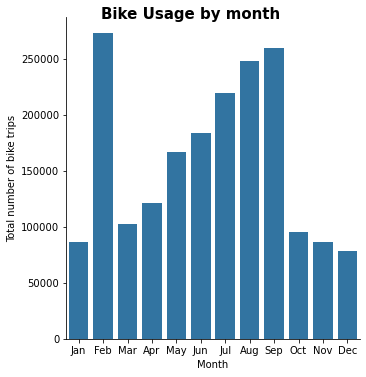

In [54]:
import calendar
base_color = sb.color_palette()[0]
df_goBike_temp = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_temp['Start_Month'] = df_goBike_temp['Start_Month'].apply(lambda x: calendar.month_abbr[x])

#plot it
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sns.catplot(data = df_goBike_temp,x='Start_Month',kind='count',color=base_color , order=months)
g.set_axis_labels('Month','Total number of bike trips')
g.fig.suptitle('Bike Usage by month', y=1,fontsize=15, fontweight='bold')

<b>The second month is very heigh among the others. We think that because we have only the first two months of 2019. We need to filter our data by year and then plot it again</b>

<ipython-input-56-ccd644f25184>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goBike_2018_2017['Start_Month'] = df_goBike_2018_2017['Start_Month'].apply(lambda x: calendar.month_abbr[x])


Text(0.5, 1, 'Bike Usage by month')

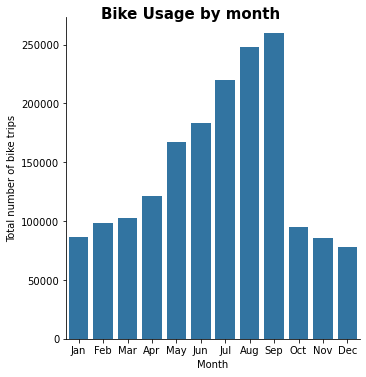

In [56]:
# filter by year 
df_goBike_2018_2017 = df_goBike_clean.query('Start_Year != 2019')

# convert the months numbers to months names
df_goBike_2018_2017['Start_Month'] = df_goBike_2018_2017['Start_Month'].apply(lambda x: calendar.month_abbr[x])

#plot it
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sns.catplot(data = df_goBike_2018_2017,x='Start_Month',kind='count',color=base_color, order = months)
g.set_axis_labels('Month','Total number of bike trips')
g.fig.suptitle('Bike Usage by month', y=1,fontsize=15, fontweight='bold')



<b>From the figure, the usage of FordGobike is very high in the summer. Then it cut off rather decreasing from September to October. It decreases slightly until January, where it starts increasing gradually until Mary where the demand breaks the increasing rate.</b>

<b>Let's plot the two plots next to each other.</b>

Text(0.5, 1.0, 'The riding in 2017-2018')

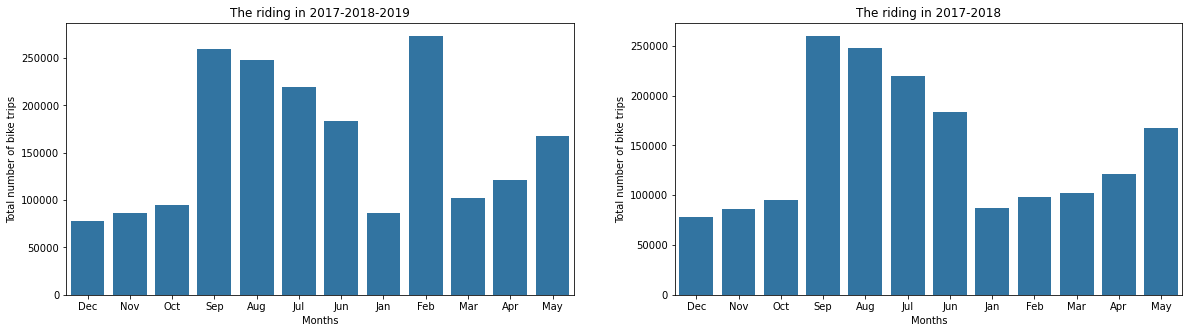

In [57]:
plt.figure(figsize = [20, 5])
# make a copy
df_goBike_clean_copy = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_clean_copy['Start_Month'] = df_goBike_clean_copy['Start_Month'].apply(lambda x: calendar.month_abbr[x])

# filter by year
df_goBike_2018_2017 = df_goBike_clean_copy.query('Start_Year !=2019')


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.subplot(1, 2, 1) 
sb.countplot(data=df_goBike_clean_copy, x='Start_Month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bike trips")
plt.title("The riding in 2017-2018-2019")

plt.subplot(1, 2, 2) 
sb.countplot(data=df_goBike_2018_2017, x='Start_Month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bike trips")
plt.title("The riding in 2017-2018")

<b>From figure, the usage of the bikes is unnormal high in February 2019 compared to the same month in 2017 and 2108. There is something happening out of our data that needs to be analyzed beyond our investigation.</b> 

<b>Let's see the difference.</b>

In [58]:
df_2019 = df_goBike_clean.query('Start_Year == 2019 & Start_Month == 2')
df_2018 = df_goBike_clean.query('Start_Year == 2018 & Start_Month == 2')
df_2017 = df_goBike_clean.query('Start_Year == 2017 & Start_Month == 2')
print(df_2019.shape[0], df_2018.shape[0], df_2017.shape[0])

174880 98498 0


<b> The differene is big between Feb in 2018 and 2019. Our data starts from Jun 2017 until Feb 2019</b>

### Lets See the usage of FordGoBike by Weekdays.

Text(0.5, 1, 'Bike Usage by weekdays')

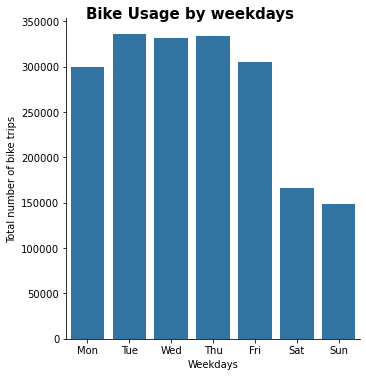

In [59]:
df_goBike_temp = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_temp['Start_Day_of_Week'] = df_goBike_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
#order=weekdays
#plot it
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sns.catplot(data = df_goBike_temp,x='Start_Day_of_Week',kind='count',color=base_color, order = weekdays)
g.set_axis_labels('Weekdays','Total number of bike trips')
g.fig.suptitle('Bike Usage by weekdays', y=1,fontsize=15, fontweight='bold')

<b>From the plot, The FordGoBike usage is mainly used during the weekdays. The most popular days are Tuesday to Thursday, and Friday and Monday are almost the same in the number of rides. The number drops largely about a half on Saturday and Sunday, indicating that mainly use of FordGoBike is on working days.</b>

### What the usage of FordGoBike by hour?

<Figure size 1440x360 with 0 Axes>

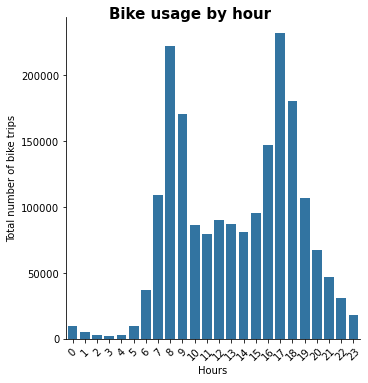

In [60]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 20,4
plt.figure(figsize = [20, 5])

g = sns.catplot(data=df_goBike_clean ,x='Start_Hour',kind='count',color=base_color)
g.set_axis_labels('Hours','Total number of bike trips')
g.fig.suptitle('Bike usage by hour', y=1,fontsize=15, fontweight='bold')
g.set_xticklabels(rotation=45)

<b>From figure, we can suggest that the bikes are mainly used for work commutes. The most usages in the morning are during 8 and 9, and in the evening during 17 and 18.</b>

In [61]:
df_goBike_temp.columns

Index(['level_0', 'index', 'duration_sec', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'Start_Date', 'Start_Year', 'Start_Month', 'Start_Day_of_Week',
       'Start_Time', 'Start_Hour', 'Start_Min', 'End_Date', 'End_Year',
       'End_Month', 'End_Day_of_Week', 'End_Hour', 'End_Min', 'member_age',
       'duration_min'],
      dtype='object')

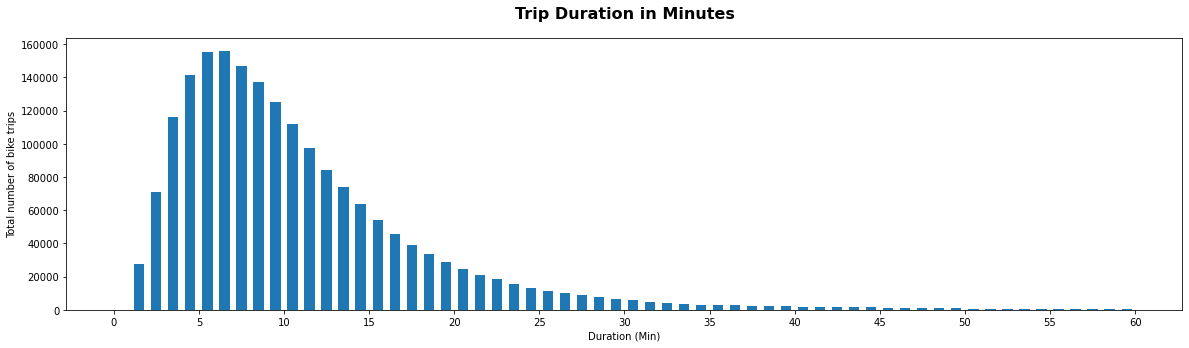

In [62]:
plt.figure(figsize = [20, 5])

bin_edges = np.arange(0, 60 + 1, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45, 50, 55, 60]
#ticks = np.arange(0, 60 + 1, 1)

labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_goBike_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Total number of bike trips');


<b>Observation: As seen in the earlier visualization,the average trip is just under 12.5 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range suggesting that people use the system for short commute travel.</b>

<b>let's check out the average.</b>

In [63]:
(df_goBike_clean['duration_min'].describe()).round(decimals=3)

count    1922031.000
mean          13.150
std           35.658
min            1.017
25%            5.800
50%            9.067
75%           13.950
max         1438.017
Name: duration_min, dtype: float64

<b>As seen in the above visualization, the average trip is about 13 minutes with 75% of the trips being under 14 minutes. The histogram shows that most rides is between 2 and 14 mintues which indicating that people ride for short commute travel.</b> 

### The usage of Bike by Age

In [64]:
(df_goBike_clean.member_age.describe()).round(decimals=3)

count    1922031.000
mean          37.532
std           10.308
min           19.000
25%           30.000
50%           35.000
75%           43.000
max          100.000
Name: member_age, dtype: float64

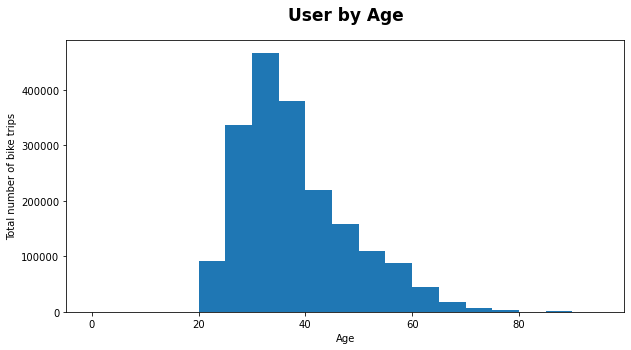

In [65]:
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, 100, 5)
#ticks = [20, 30, 40,  50, 60, 70, 80, 90, 100]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data=df_goBike_clean,x='member_age', bins=bin_edges, )
plt.title("User by Age", y=1.05, fontsize=17, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Total number of bike trips');
#plt.xticks(ticks,labels)

<b>From the plot, the average age of riders is about 37 and the most of the riders fall between the ages 25 and 45, which is the age of the most workers!</b>

## Riders by Gender

In [66]:
(df_goBike_clean['member_gender'].value_counts().describe()).round(decimals=2)

count          3.00
mean      640677.00
std       714435.43
min        29619.00
25%       247926.00
50%       466233.00
75%       946206.00
max      1426179.00
Name: member_gender, dtype: float64

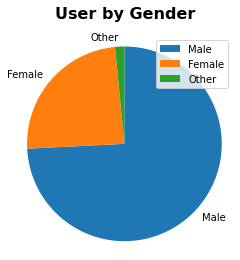

In [67]:
# Use the same pokemon dataset
sorted_counts = df_goBike_clean['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('User by Gender', y=1.05, fontsize=16, fontweight='bold');
plt.legend()

<b> Form the pie chart, we see that about 72% of riders are male and 23% for female. The remaining is the other genders.</b>

### which location has the most trip?

<b>First, we need to know how many stations we have? </b>

In [68]:
len(df_goBike_clean['start_station_name'].value_counts())

363

<b> As it is hard to explore all 363 stations, We choose the top 10 ones.</b>

In [71]:
df_goBike_clean['start_station_name'].value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    40802
San Francisco Caltrain (Townsend St at 4th St)               40190
San Francisco Ferry Building (Harry Bridges Plaza)           39320
Market St at 10th St                                         38614
Berry St at 4th St                                           37851
Montgomery St BART Station (Market St at 2nd St)             35671
The Embarcadero at Sansome St                                33136
Powell St BART Station (Market St at 4th St)                 31460
Howard St at Beale St                                        31408
Steuart St at Market St                                      30781
Name: start_station_name, dtype: int64

<b> subset the dataset by keeping only top 10 locations with high traffics</b>

In [78]:
# Subset the dataset by keeping only top 10 locations 
locs = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
        'San Francisco Caltrain (Townsend St at 4th St)',
        'San Francisco Ferry Building (Harry Bridges Plaza)',
        'Market St at 10th St',
        'Berry St at 4th St',
        'Montgomery St BART Station (Market St at 2nd St)',
        'The Embarcadero at Sansome St',
        'Powell St BART Station (Market St at 4th St)',
        'Howard St at Beale St',
        'Steuart St at Market St',]
        
df_locations_Top10 = df_goBike_clean.loc[df_goBike_clean['start_station_name'].isin(locs)]

In [79]:
# get index for ordreing the bins in the plot
stations = df_locations_Top10['start_station_name'].value_counts() 
order = stations.index

In [80]:
len(stations.index)

10

In [81]:
df_locations_Top10.shape

(359233, 31)

In [82]:
for i in locs:
    print(df_goBike_clean[df_goBike_clean['start_station_name'] == i].count()[0])
                          

40802
40190
39320
38614
37851
35671
33136
31460
31408
30781


In [83]:
df_goBike_clean[df_goBike_clean['start_station_name'] == "San Francisco Caltrain Station 2  (Townsend St at 4th St)"].count()[0]

40802

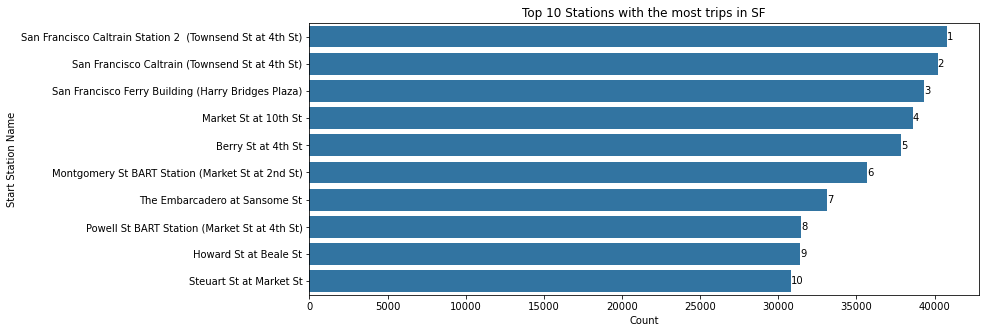

In [84]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df_locations_Top10, y='start_station_name', color=base_color, order = order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations with the most trips in SF');

index = 0
for i in locs:
    #pct_string = '{:0.1f}'.format(df_goBike_clean[df_goBike_clean['start_station_name'] == i].count()[0])
    c = df_goBike_clean[df_goBike_clean['start_station_name'] == i].count()[0]
    plt.text(c+1, index, index + 1, va='center')
    index = index + 1
    

<b>From the visualization, we can see that the trip differences between the top 4 are almost similar, then the following three stations. The stations ranked eight and ninth have nearly the same trips</b>    

<a id='b_exploration'></a>
## Bivariate Exploration

### What is the user type proportion for the FordGoBike system?

In [85]:
# calculate the customer and subscriber proportions
customer = df_goBike_clean[df_goBike_clean.user_type == "Customer"]['bike_id'].count()
subscriber = df_goBike_clean[df_goBike_clean.user_type ==  "Subscriber"]['bike_id'].count()


customer_prop = customer / df_goBike_clean['bike_id'].count()
subscriber_prop = subscriber / df_goBike_clean['bike_id'].count()

In [86]:
customer_prop

0.11356112362391657

In [87]:
subscriber_prop

0.8864388763760834

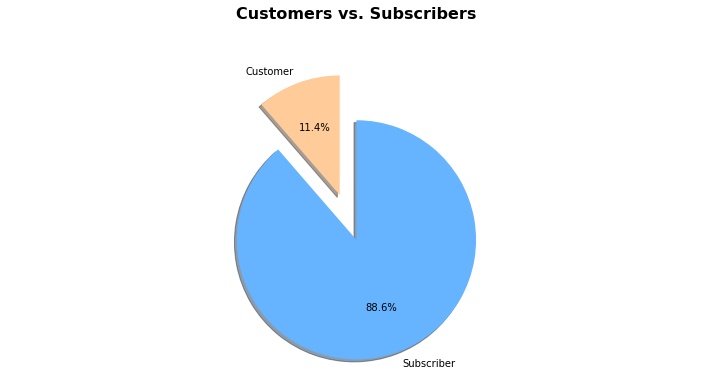

In [88]:
plt.figure(figsize=[10,5])

labels = ['Customer','Subscriber']
sizes = [customer_prop,subscriber_prop]
explode = (0,0.4)
colors = ['#ffcc99','#66b3ff']

plt.pie(sizes,explode=explode,labels=labels,colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')
plt.suptitle('Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
plt.tight_layout()

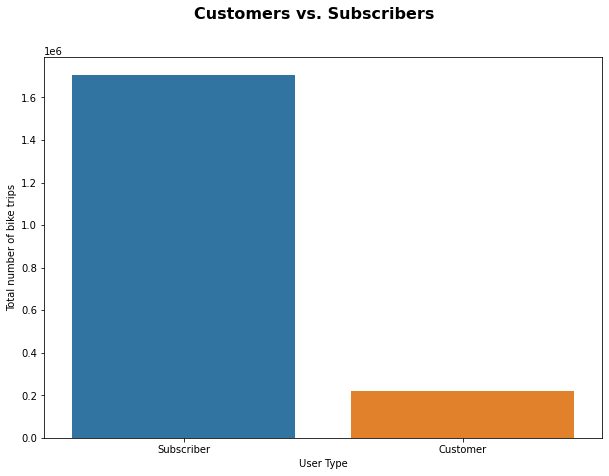

In [89]:
plt.figure(figsize=[10,7])
order = df_goBike_clean.user_type.value_counts().index
v = sb.countplot(data = df_goBike_clean, x = 'user_type', order = order )
v.set_xlabel('User Type')
v.set_ylabel('Total number of bike trips')
plt.suptitle('Customers vs. Subscribers', fontsize=16, fontweight='bold');

<b> Subscribers represent 88% in terms of system users. The rest is the occasional riders.</b> 

### what is the monthly usage of bikes per user type?

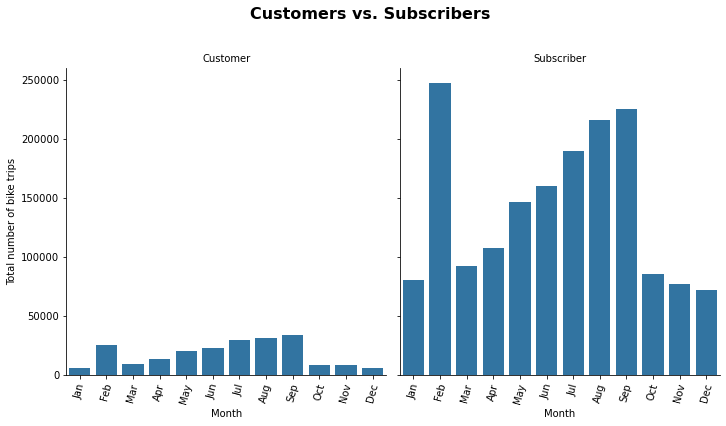

In [90]:
df_goBike_temp = df_goBike_clean.copy()
df_goBike_temp['Start_Month'] = df_goBike_temp['Start_Month'].apply(lambda x: calendar.month_abbr[x])
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
v = sns.catplot(data=df_goBike_temp, x='Start_Month',col='user_type',
                color=base_color, sharey=True, kind='count', order=months)
v.set_axis_labels('Month','Total number of bike trips')
v.set_titles("{col_name}")
plt.suptitle('Customers vs. Subscribers', y=1.1, fontsize=16, fontweight='bold');
v.set_xticklabels(rotation=75);

In [91]:
df_goBike_clean_copy = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_clean_copy['Start_Month'] = df_goBike_clean_copy['Start_Month'].apply(lambda x: calendar.month_abbr[x])

# filter by year
df_goBike_2018_2017 = df_goBike_clean_copy.query('Start_Year == 2017')


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

### what is the weekley usage of bikes per user type?

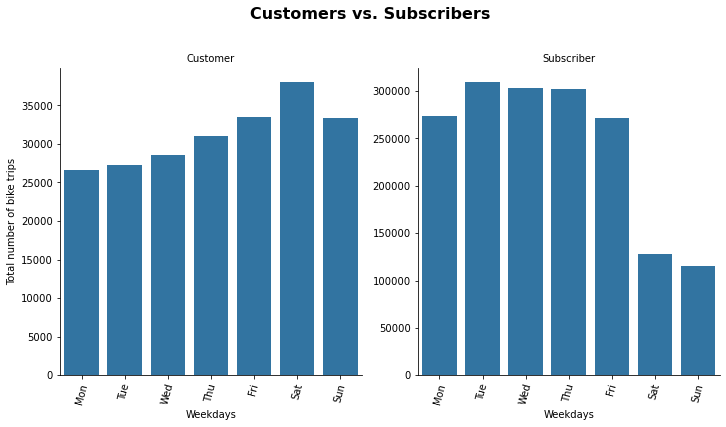

In [92]:
df_goBike_temp = df_goBike_clean.copy()
df_goBike_temp['Start_Day_of_Week'] = df_goBike_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
v = sns.catplot(data=df_goBike_temp, x='Start_Day_of_Week',col='user_type',
                color=base_color, sharey=False, kind='count', order=weekdays)
v.set_axis_labels('Weekdays','Total number of bike trips')
v.set_titles("{col_name}")
plt.suptitle('Customers vs. Subscribers', y=1.1, fontsize=16, fontweight='bold');
v.set_xticklabels(rotation=75);

<b> In general, customers have clearly a low usage of the bikes in terms of user type. However, customers seem to be more active on the weekend compared to subscribers.</b>

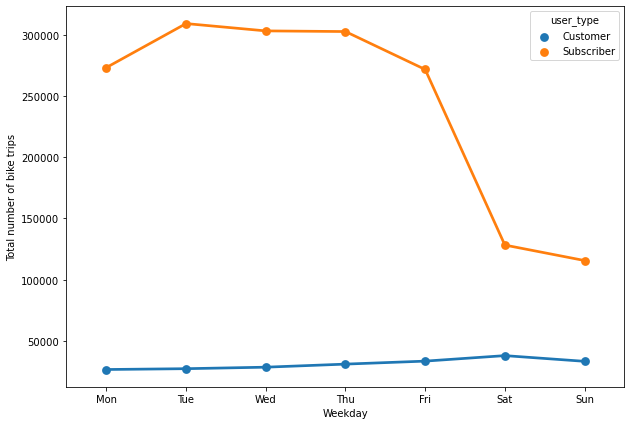

In [93]:
plt.figure(figsize=(10, 7))

df_user_week = df_goBike_clean.groupby(['Start_Day_of_Week', 'user_type']).size().reset_index()
df_user_week['Start_Day_of_Week'] = df_user_week['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']


sb.pointplot(data=df_user_week , x='Start_Day_of_Week',y=0, hue='user_type', order = weekdays)
plt.xlabel('Weekday')
plt.ylabel('Total number of bike trips');

<b> To understand the relationship more, we use different plot.</b>`

### How about trip duration per user type?

Text(0, 0.5, 'Duration in Minute')

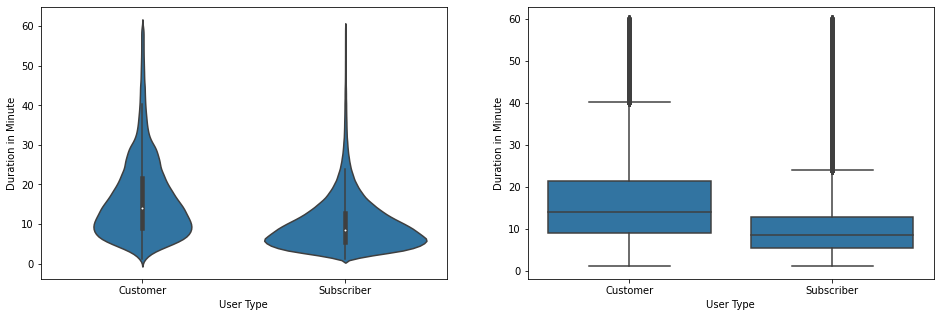

In [94]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

df_temp= df_goBike_clean.query('duration_min < 60')

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_temp, x='user_type', y='duration_min', color=base_color, innner='quartile')
#plt.xticks(rotation=15);
plt.xlabel("User Type")
plt.ylabel("Duration in Minute")
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_temp, x='user_type', y='duration_min', color=base_color)
plt.xlabel("User Type")
plt.ylabel("Duration in Minute")
#plt.xticks(rotation=15);
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

<b> Generally, we can say that trip durations for customers are longer than subscribers. From two figures, trip durations for customers and subscriber are 8-22 minutes and 7-14 minutes Sequentially.</b>

###  Riding Count based on  User Typer and Member Gender on top 10 stations

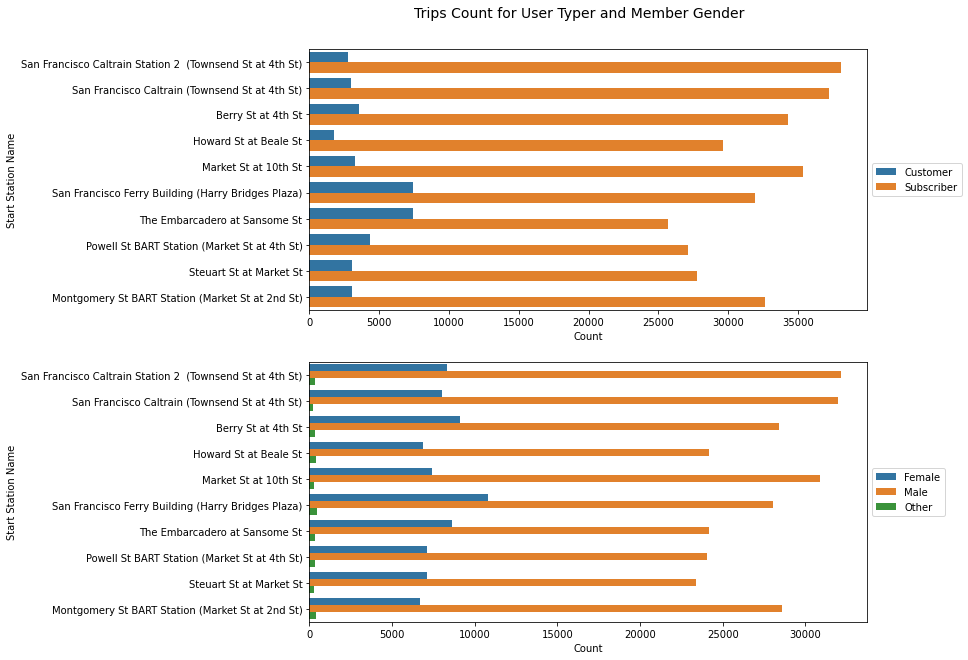

In [95]:
# 3. Categorical variables by plotting countplot: top 8 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.92)
users = ['user_type','member_gender']
fig.suptitle('Trips Count for User Typer and Member Gender', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_locations_Top10, y='start_station_name', hue=users[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

<b> In general, male subscribers are more by far female customers in all stations. However, the amount of the same gender shows variety among stations.</b>

<a id='m_exploration'></a>
## Multivariate Exploration

### The number of gender per customers and subscribers

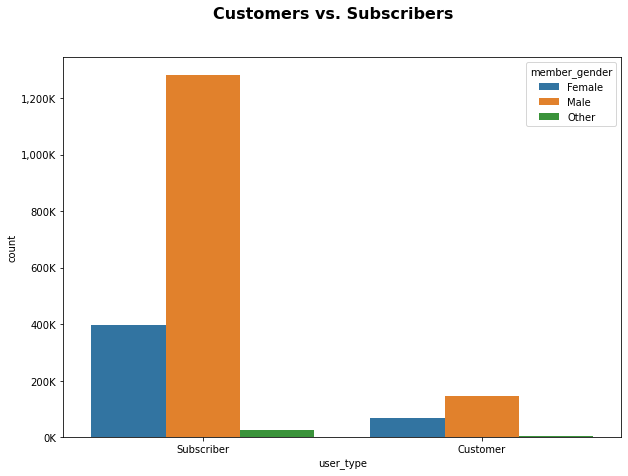

In [96]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize = [10, 7])

order = df_goBike_clean.user_type.value_counts().index
v= sb.countplot(data = df_goBike_clean, x = 'user_type', hue = 'member_gender', order = order)
#v.set_xlabel("User Type")
#v.set_ylabel('Total number of bike trips')
plt.suptitle('Customers vs. Subscribers', fontsize=16, fontweight='bold');

f = lambda x, pos: f'{x/10**3:,.0f}K'
v.yaxis.set_major_formatter(FuncFormatter(f))


<b> In general, males are briding more than females whether they are customers or subscribers. Female subscribers are about 33% of male subscribers, whereas Female customers are about 50%of male subscribers.</b>

### Monthly Usage as per gender

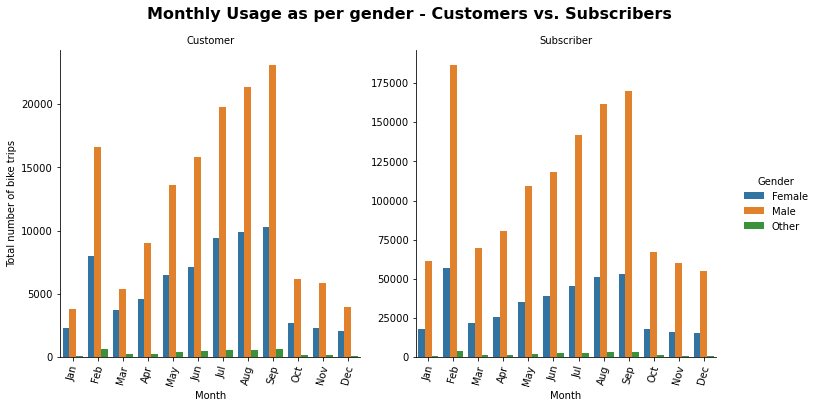

In [97]:
df_goBike_temp = df_goBike_clean.copy()
df_goBike_temp['Start_Month'] = df_goBike_temp['Start_Month'].apply(lambda x: calendar.month_abbr[x])
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

v = sns.catplot(data = df_goBike_temp, x='Start_Month', 
                col='user_type', hue='member_gender',sharey=False,kind='count', order=months)

v.set_axis_labels('Month','Total number of bike trips')
v.set_titles("{col_name}")
v._legend.set_title('Gender')
plt.suptitle('Monthly Usage as per gender - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
v.set_xticklabels(rotation=75);

<b>Males are the most riders. The difference between males and females is nearly 50%  in customer terms and about 60% in subscribers. In January and March, the female customer is making the gab smaller to male customers. In the summer season, demand is increasing at about double the rate in other months.</b>

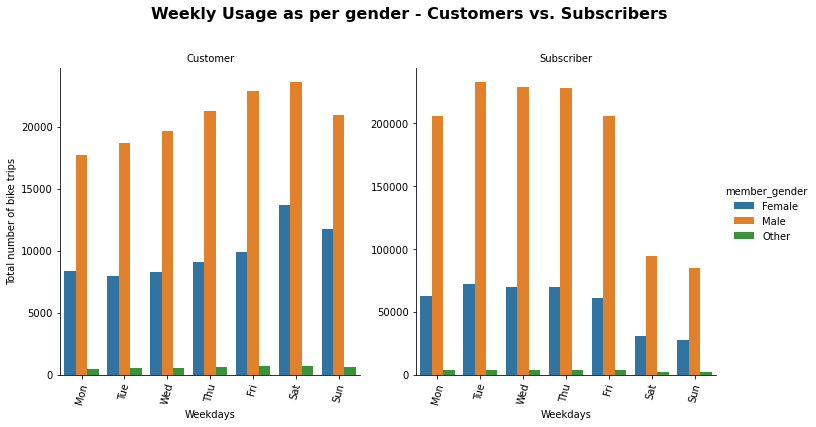

In [98]:
df_goBike_temp = df_goBike_clean.copy()
df_goBike_temp['Start_Day_of_Week'] = df_goBike_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

v = sns.catplot(data=df_goBike_temp, x='Start_Day_of_Week', 
                col='user_type', hue='member_gender', sharey=False, kind='count', order=weekdays)

v.set_axis_labels('Weekdays','Total number of bike trips')
v.set_titles("{col_name}")
plt.suptitle('Weekly Usage as per gender - Customers vs. Subscribers', y=1.1, fontsize=16, fontweight='bold');
v.set_xticklabels(rotation=75);

<b>As the previous visualizations, the trends of males and females are similar. For customers, the demand increases on weekends, while it decreases for subscribers.</b>

### Top 10 trip stations by time (Morning, Afternoon, Night)

In [99]:
# we need to add column containing the day parts.
df_temp= df_locations_Top10.copy()
#df_temp['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df_temp['Day_parts'] = 'morning'
df_temp['Day_parts'][(df_temp['Start_Hour'] >= 12) & (df_temp['Start_Hour'] <= 17)] = 'afternoon'
df_temp['Day_parts'][(df_temp['Start_Hour'] >= 18) & (df_temp['Start_Hour'] <= 23)] = 'night'





<ipython-input-99-ee13276aa44a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Day_parts'][(df_temp['Start_Hour'] >= 12) & (df_temp['Start_Hour'] <= 17)] = 'afternoon'
<ipython-input-99-ee13276aa44a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Day_parts'][(df_temp['Start_Hour'] >= 18) & (df_temp['Start_Hour'] <= 23)] = 'night'


In [100]:
# seperate user type for plotting
df_customers = df_temp.query('user_type == "Customer"')
df_subscribers = df_temp.query('user_type == "Subscriber"')

In [101]:
df_locations_Top10.start_station_name.unique()

array(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Berry St at 4th St', 'Howard St at Beale St',
       'Market St at 10th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'The Embarcadero at Sansome St',
       'Powell St BART Station (Market St at 4th St)',
       'Steuart St at Market St',
       'Montgomery St BART Station (Market St at 2nd St)'], dtype=object)

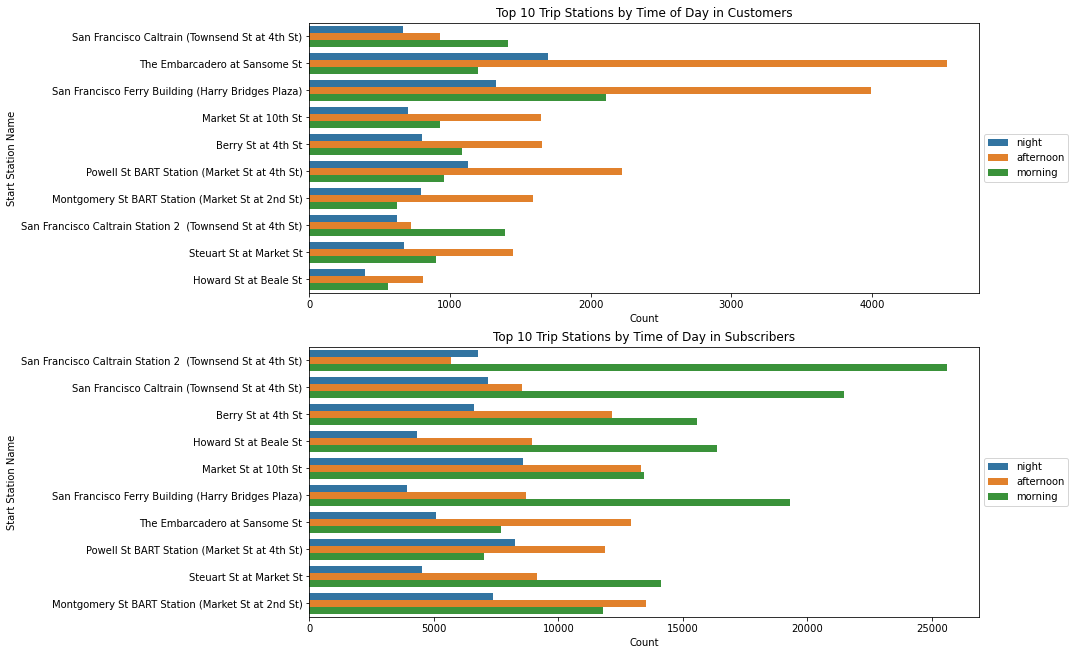

In [102]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(top=0.95)

fig.add_subplot(2, 1, 1)
sb.countplot(data=df_customers, y='start_station_name', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

fig.add_subplot(2, 1, 2)
sb.countplot(data=df_subscribers, y='start_station_name', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

<b>Generally, customers seem to ride more in the afternoon and subscribers in the morning. There are only two stations for customers where the morning's bike usage is more than in the afternoon. For subscribers, three only stations have more riding in the afternoon.</b>

### Montly Usage by Time of day for Customers and Subscribers

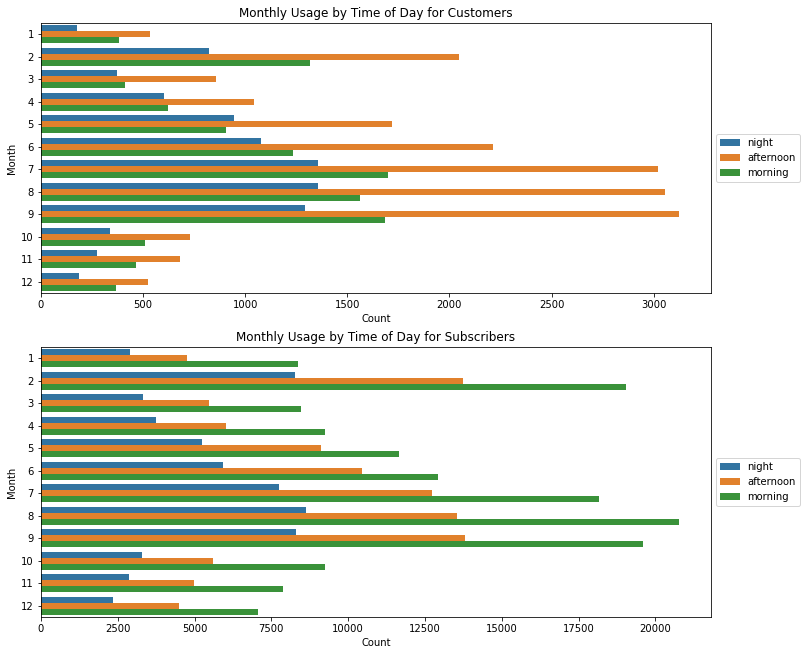

In [103]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(top=0.95)

fig.add_subplot(2, 1, 1)
sb.countplot(data=df_customers, y='Start_Month', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Monthly Usage by Time of Day for Customers')
plt.xlabel('Count')
plt.ylabel('Month')

fig.add_subplot(2, 1, 2)
sb.countplot(data=df_subscribers, y='Start_Month', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Monthly Usage by Time of Day for Subscribers')
plt.xlabel('Count')
plt.ylabel('Month');

<b> Data clearly shows that Customers prefer biking in the afternoon, while subscribers prefer biking in the morning.</b>

In [104]:
df_goBike_clean.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

### How many FordGoBike users weekly, and what their ages?

<ipython-input-105-81e59165ae6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['age_interval'][(df_temp['member_age'] > 30) & (df_temp['member_age'] <=40 )] = '31-40'
<ipython-input-105-81e59165ae6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['age_interval'][(df_temp['member_age'] > 40) & (df_temp['member_age'] <=50 )] = '41-50'
<ipython-input-105-81e59165ae6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

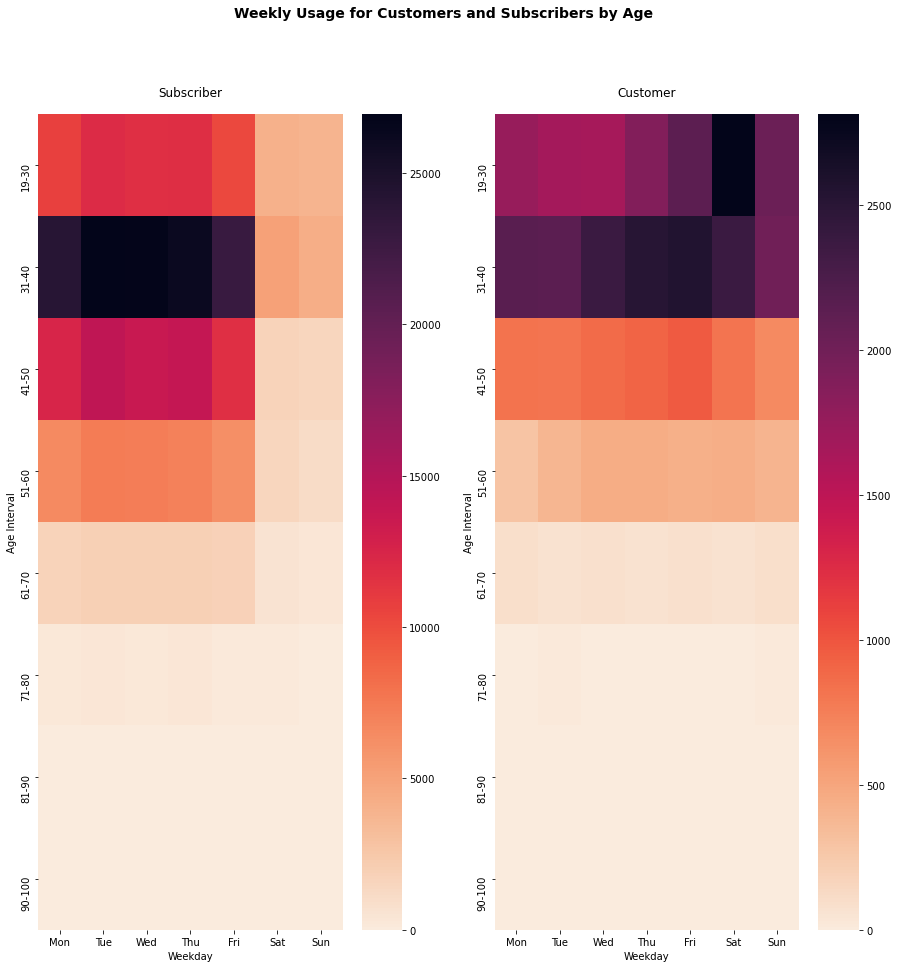

In [105]:
# we need to add column containing the day parts.
df_temp= df_locations_Top10.copy()
#df_temp['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df_temp['age_interval'] = '19-30'
df_temp['age_interval'][(df_temp['member_age'] > 30) & (df_temp['member_age'] <=40 )] = '31-40'
df_temp['age_interval'][(df_temp['member_age'] > 40) & (df_temp['member_age'] <=50 )] = '41-50'
df_temp['age_interval'][(df_temp['member_age'] > 50) & (df_temp['member_age'] <=60 )] = '51-60'
df_temp['age_interval'][(df_temp['member_age'] > 60) & (df_temp['member_age'] <=70 )] = '61-70'
df_temp['age_interval'][(df_temp['member_age'] > 70) & (df_temp['member_age'] <=80 )] = '71-80'
df_temp['age_interval'][(df_temp['member_age'] > 80) & (df_temp['member_age'] <=90 )] = '81-90'
df_temp['age_interval'][(df_temp['member_age'] > 90) & (df_temp['member_age'] <=100 )] = '90-100'

df_temp['Start_Day_of_Week'] = df_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
df_temp['Start_Day_of_Week'] = pd.Categorical(df_temp['Start_Day_of_Week'], 
                                               categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                               ordered=True)

plt.figure(figsize=(15,15))
plt.suptitle('Weekly Usage for Customers and Subscribers by Age', fontsize=14, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1)
df_subscriber =  df_temp.query('user_type == "Subscriber"').groupby(["age_interval", "Start_Day_of_Week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("age_interval", "Start_Day_of_Week", "bike_id")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Age Interval');


# heatmap for customers
plt.subplot(1, 2, 2)
df_customer =  df_temp.query('user_type == "Customer"').groupby(["age_interval", "Start_Day_of_Week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("age_interval", "Start_Day_of_Week", "bike_id")
sb.heatmap(df_customer, cmap="rocket_r")


plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Age Interval');


<b>The age interval between 31 and 40 is the highest usage of the bikes during weekdays. Surprisingly, the second-highest age interval is between 41 and 50, whereas the ages between 20 and 30 are the third.</b>